In [2]:
import pandas as pd
df = pd.read_csv('F:\\Udemy Courses\\Udemy - Machine Learning\\Py-Master\\ML\\13_kmeans\\income.csv')
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
df.head()

,Name,Age,Income($)
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000


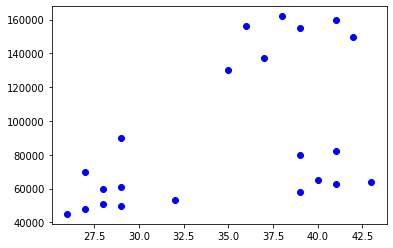

In [6]:
plt.scatter(df.Age,df['Income($)'],color='blue')

In [7]:
km = KMeans(n_clusters=3)
km

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [10]:
y_predicted = km.fit_predict(df[['Age', 'Income($)']])
y_predicted

array([0, 0, 2, 2, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2])

In [12]:
df['clusters'] = y_predicted
df.head()

,Name,Age,Income($),clusters
0,Rob,27,70000,0
1,Michael,29,90000,0
2,Mohan,29,61000,2
3,Ismail,28,60000,2
4,Kory,42,150000,1


No handles with labels found to put in legend.


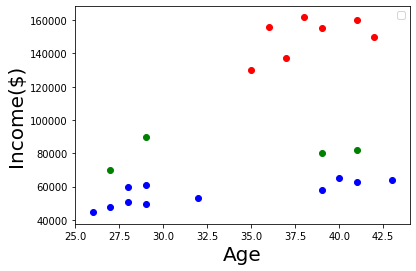

In [23]:
df1 = df[df.clusters==0]
df2 = df[df.clusters==1]
df3 = df[df.clusters==2]

plt.scatter(df1.Age, df1['Income($)'],color='green')
plt.scatter(df2.Age, df2['Income($)'],color='red')
plt.scatter(df3.Age, df3['Income($)'],color='blue')

plt.xlabel('Age',fontsize=20)
plt.ylabel('Income($)',fontsize=20)
plt.legend()

In [30]:
scaler = MinMaxScaler()
scaler.fit(df[['Income($)']])
df[['Income($)']] = scaler.transform(df[['Income($)']])
scaler.fit(df[['Age']])
df[['Age']] = scaler.transform(df[['Age']])
df.head()

,Name,Age,Income($),clusters
0,Rob,0.058824,0.213675,0
1,Michael,0.176471,0.384615,0
2,Mohan,0.176471,0.136752,2
3,Ismail,0.117647,0.128205,2
4,Kory,0.941176,0.897436,1


In [31]:
km = KMeans(n_clusters=3)
y_predicted = km.fit_predict(df[['Age', 'Income($)']])
y_predicted

array([1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2])

In [33]:
df['clusters'] = y_predicted
df.head()

,Name,Age,Income($),clusters
0,Rob,0.058824,0.213675,1
1,Michael,0.176471,0.384615,1
2,Mohan,0.176471,0.136752,1
3,Ismail,0.117647,0.128205,1
4,Kory,0.941176,0.897436,0


In [37]:
km.cluster_centers_

array([[0.72268908, 0.8974359 ],
       [0.1372549 , 0.11633428],
       [0.85294118, 0.2022792 ]])

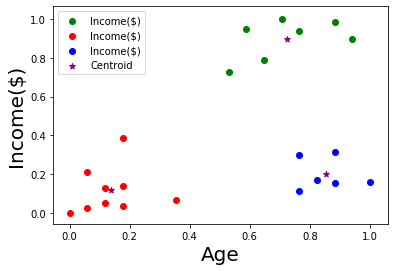

In [38]:
df1 = df[df.clusters==0]
df2 = df[df.clusters==1]
df3 = df[df.clusters==2]

plt.scatter(df1.Age, df1['Income($)'],color='green',label='Income($)')
plt.scatter(df2.Age, df2['Income($)'],color='red',label='Income($)')
plt.scatter(df3.Age, df3['Income($)'],color='blue',label='Income($)')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='*',label='Centroid')
plt.xlabel('Age',fontsize=20)
plt.ylabel('Income($)',fontsize=20)
plt.legend()

In [39]:
k_rng = range(1,10)
sse = []
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(df[['Age','Income($)']])
    sse.append(km.inertia_)

In [40]:
sse

[5.434011511988176,
 2.0911363886990766,
 0.47507834985530945,
 0.36877340764405886,
 0.26217927623452125,
 0.21578607765873015,
 0.16858512236029755,
 0.1326541982724516,
 0.10383752586603558]

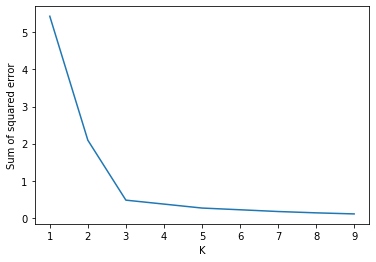

In [41]:
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(k_rng,sse)

## Here we can see that K=3 according to elbow